# CNN Assignment

Build an image classifier with Keras and Convolutional Neural Networks for the [Fashion MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. 

![Image](https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png)

There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot


We have used this dataset before (check Session 12). It is a drop-in replacement of the MNIST dataset, but more fashionable (no pun intended:).

**Hint: Check the MNIST (B&W image) notebook in Session 13**

### Import typical libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras import backend as K
import keras

### Load the data

Run the code below to download the dataset using Keras

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Visualize the Data

Use matplotlib to view a(ny)image of your choice from the training data set. 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

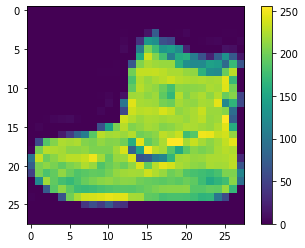

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocess the Data



In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
img_rows, img_cols = 28, 28
batch_size = 128

In [10]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Build the Model

**Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)
* Dropout layer , rate = 0.2
* 2D Convolutional Layer, filters=64 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)
* Dropout layer rate = 0.2
* Flatten Layer
* Dense Layer (1024 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Display the model summary

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              7930880   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)             

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model
Train/Fit the model. Amount of epochs is up to you

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),callbacks=[early_stop]);

Epoch 1/2
1875/1875 [==============================] - 319s 170ms/step - loss: 1.8243 - accuracy: 0.6362 - val_loss: 1.7766 - val_accuracy: 0.6825
Epoch 2/2
1875/1875 [==============================] - 322s 172ms/step - loss: 1.6576 - accuracy: 0.8032 - val_loss: 1.6077 - val_accuracy: 0.8534


### Plot the validation curves

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.824343,0.636167,1.776645,0.6825
1,1.657592,0.803200,1.607745,0.8534


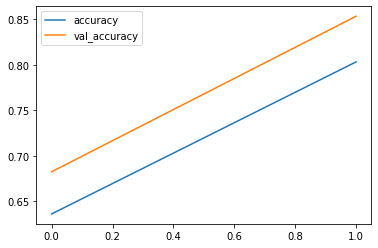

In [34]:
losses[['accuracy','val_accuracy']].plot();

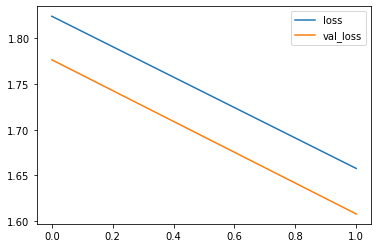

In [35]:
losses[['loss','val_loss']].plot();

### Evaluate the Model

Show the accuracy, precision, recall, and confusion matrix. 

There are quite a few ways to do this, but I suggest  that you follow the same procedure we used in previous examples.

In [36]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[1.6077451705932617, 0.8533999919891357]


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.74      0.78      0.76      1000
           3       0.86      0.88      0.87      1000
           4       0.66      0.77      0.71      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.43      0.54      1000
           7       0.92      0.97      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [40]:
cm = confusion_matrix(y_test, predictions)
cm

array([[885,   3,  12,  17,  10,   3,  60,   0,  10,   0],
       [  2, 966,   0,  22,   4,   0,   5,   0,   1,   0],
       [ 16,   2, 775,   8, 159,   0,  38,   0,   2,   0],
       [ 40,  11,   7, 881,  40,   0,  20,   0,   0,   1],
       [  1,   2, 135,  58, 770,   1,  31,   0,   2,   0],
       [  0,   0,   0,   2,   0, 957,   0,  33,   0,   8],
       [226,   1, 115,  30, 178,   0, 429,   0,  21,   0],
       [  0,   0,   0,   0,   1,   4,   0, 972,   0,  23],
       [  0,   2,   5,   7,  10,   4,   8,   5, 957,   2],
       [  0,   0,   0,   0,   0,   7,   1,  50,   0, 942]])

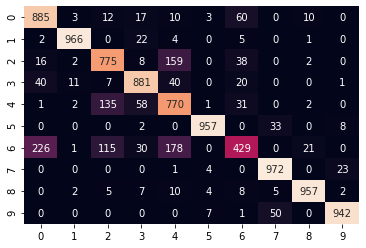

In [41]:
sns.heatmap(cm, annot=True,cbar=False,fmt='d');